<a href="https://colab.research.google.com/github/Hamycoding/Analytics-Projects/blob/main/Classification_Model_for_Credit_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Fraud Detection Project**

### **Table of Contents**

#### **1. Introduction**
   - **1.1 Project Overview**
     - Importance of fraud detection in credit card transactions.
     - Objective of the project: Detecting fraudulent transactions using machine learning and data analysis.
   - **1.2 Dataset Description**
     - Overview of the dataset: Source, structure, and key features.
     - Description of the data: Number of transactions, percentage of fraudulent transactions, and feature details.

#### **2. Data Preprocessing**
   - **2.1 Data Loading and Initial Exploration**
     - Load the dataset.
     - Inspect the dataset structure, data types, and missing values.
   - **2.2 Features Analysis**
     - Class Distribution
     - Features Distribution
   - **2.3 Correlation Analysis**
     - Create a correlation heatmap to understand relationships between features.
   - **2.4 Visualization of Important Features**
      - Generate boxplots to visualize the distribution of important features for fraudulent vs. genuine transactions.

#### **3. Outlier Detection**
   - **3.1 Introduction to Outlier Detection**
     - Define what outliers are and why they matter in fraud detection.
   - **3.2 Applying Outlier Detection Methods**
     - **3.2.1 Isolation Forest**
       - Apply Isolation Forest to detect anomalies.
       - Analyze which transactions are flagged as outliers.
     - **3.2.2 IQR Method**
       - Apply the IQR method to detect outliers.
       - Compare the results with Isolation Forest.
   - **3.3 Decision on Handling Outliers**
     - Discuss whether to retain or remove outliers based on their correlation with fraud.

#### **4. Model Building**
   - **4.1 Selection of Algorithms**
     - Discuss and select machine learning algorithms (e.g., Random Forest, XGBoost).
   - **4.2 Model Training**
     - Train-test Split using stratified cross-validation
     - Resampling Methods: Oversampling and Oversampling.
   - **4.3 Model Evaluation**
     - Evaluate models using metrics such as Precision, Recall, F1-Score, and AUC-ROC.
     - Compare performance across different models and resampling techniques.

#### **5. Conclusion**
   - **5.1 Summary of Findings**
     - Recap the key findings from the project.
   - **5.2 Challenges and Limitations**
     - Discuss any challenges faced during the project and potential limitations of the approach.
   - **5.3 Future Work**
     - Suggest areas for future research or improvements to the model.

# 1. Introduction

## 1.1. Project Overview

## 1.2. Dataset Description

**Context of the data**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content of the dataset**
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
The dataset is *highly unbalanced*, the positive class (frauds) account for 0.172% of all transactions.

It contains **only numerical input variables which are the result of a PCA transformation** due to confidentiality issues:
- Features V1, V2, … V28 are the principal components obtained with PCA
- Features which have not been transformed with PCA are 'Time' and 'Amount'
    - Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# 2. Data Preprocessing

## 2.1. Data Loading and Initial Exploration

**Load the Dataset**

In [26]:
#Import Liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn import metrics
from collections import Counter

In [27]:
#import data
df = pd.read_csv('creditcard.csv')

**Descriptive Statistics**

In [28]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [29]:
df.shape

(284807, 31)

**Checking for null values**

In [30]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Checking data types**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

30 out of 31 attributes are numerical values. Only the "Class" atrribute is categorical represented by 1 and 0. However, we can see that the "Class" is wrongly identified as float. So, we now convert this attribute to its correct type as categorical.

**Dropping Duplicates**

In [32]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 10)

Duplicated values dropped succesfully
**********


## 2.2. Features Analysis

### 2.2.1. Class Distribution

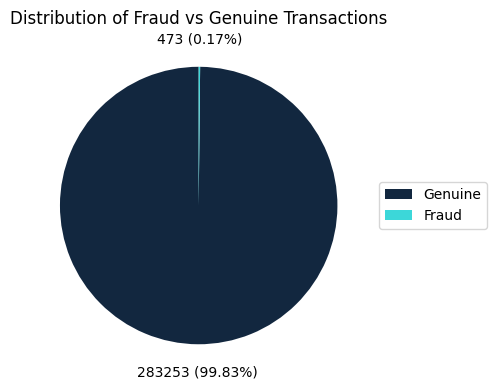

In [33]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
fraud_counts = df['Class'].value_counts()

# Define the labels and custom color codes
labels = ['Genuine', 'Fraud']
color_codes = ['#12273F', '#3CD7D9']

# Create a function to format both count and percentage
def format_func(pct, allvals):
    absolute = int(pct / 100. * sum(allvals))
    return f'{absolute} ({pct:.2f}%)'

# Create the pie chart with custom colors and both count and percentage
plt.figure(figsize=(7, 4))
patches, texts, autotexts = plt.pie(
    fraud_counts,
    colors=color_codes,
    autopct=lambda pct: format_func(pct, fraud_counts),  # Show count and percentage
    startangle=90,               # Start at 90 degrees
    pctdistance=1.2              # Move annotations outside
)

# Add a separate legend to the right
plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Fraud vs Genuine Transactions')

# Adjust the layout to make space for the legend
plt.tight_layout()
plt.show()

The dataset is highly unbalanced, with 492 transactions or only 0.17% of the total transactions are 'Fraud'.

## 2.2.2. Features Distribution

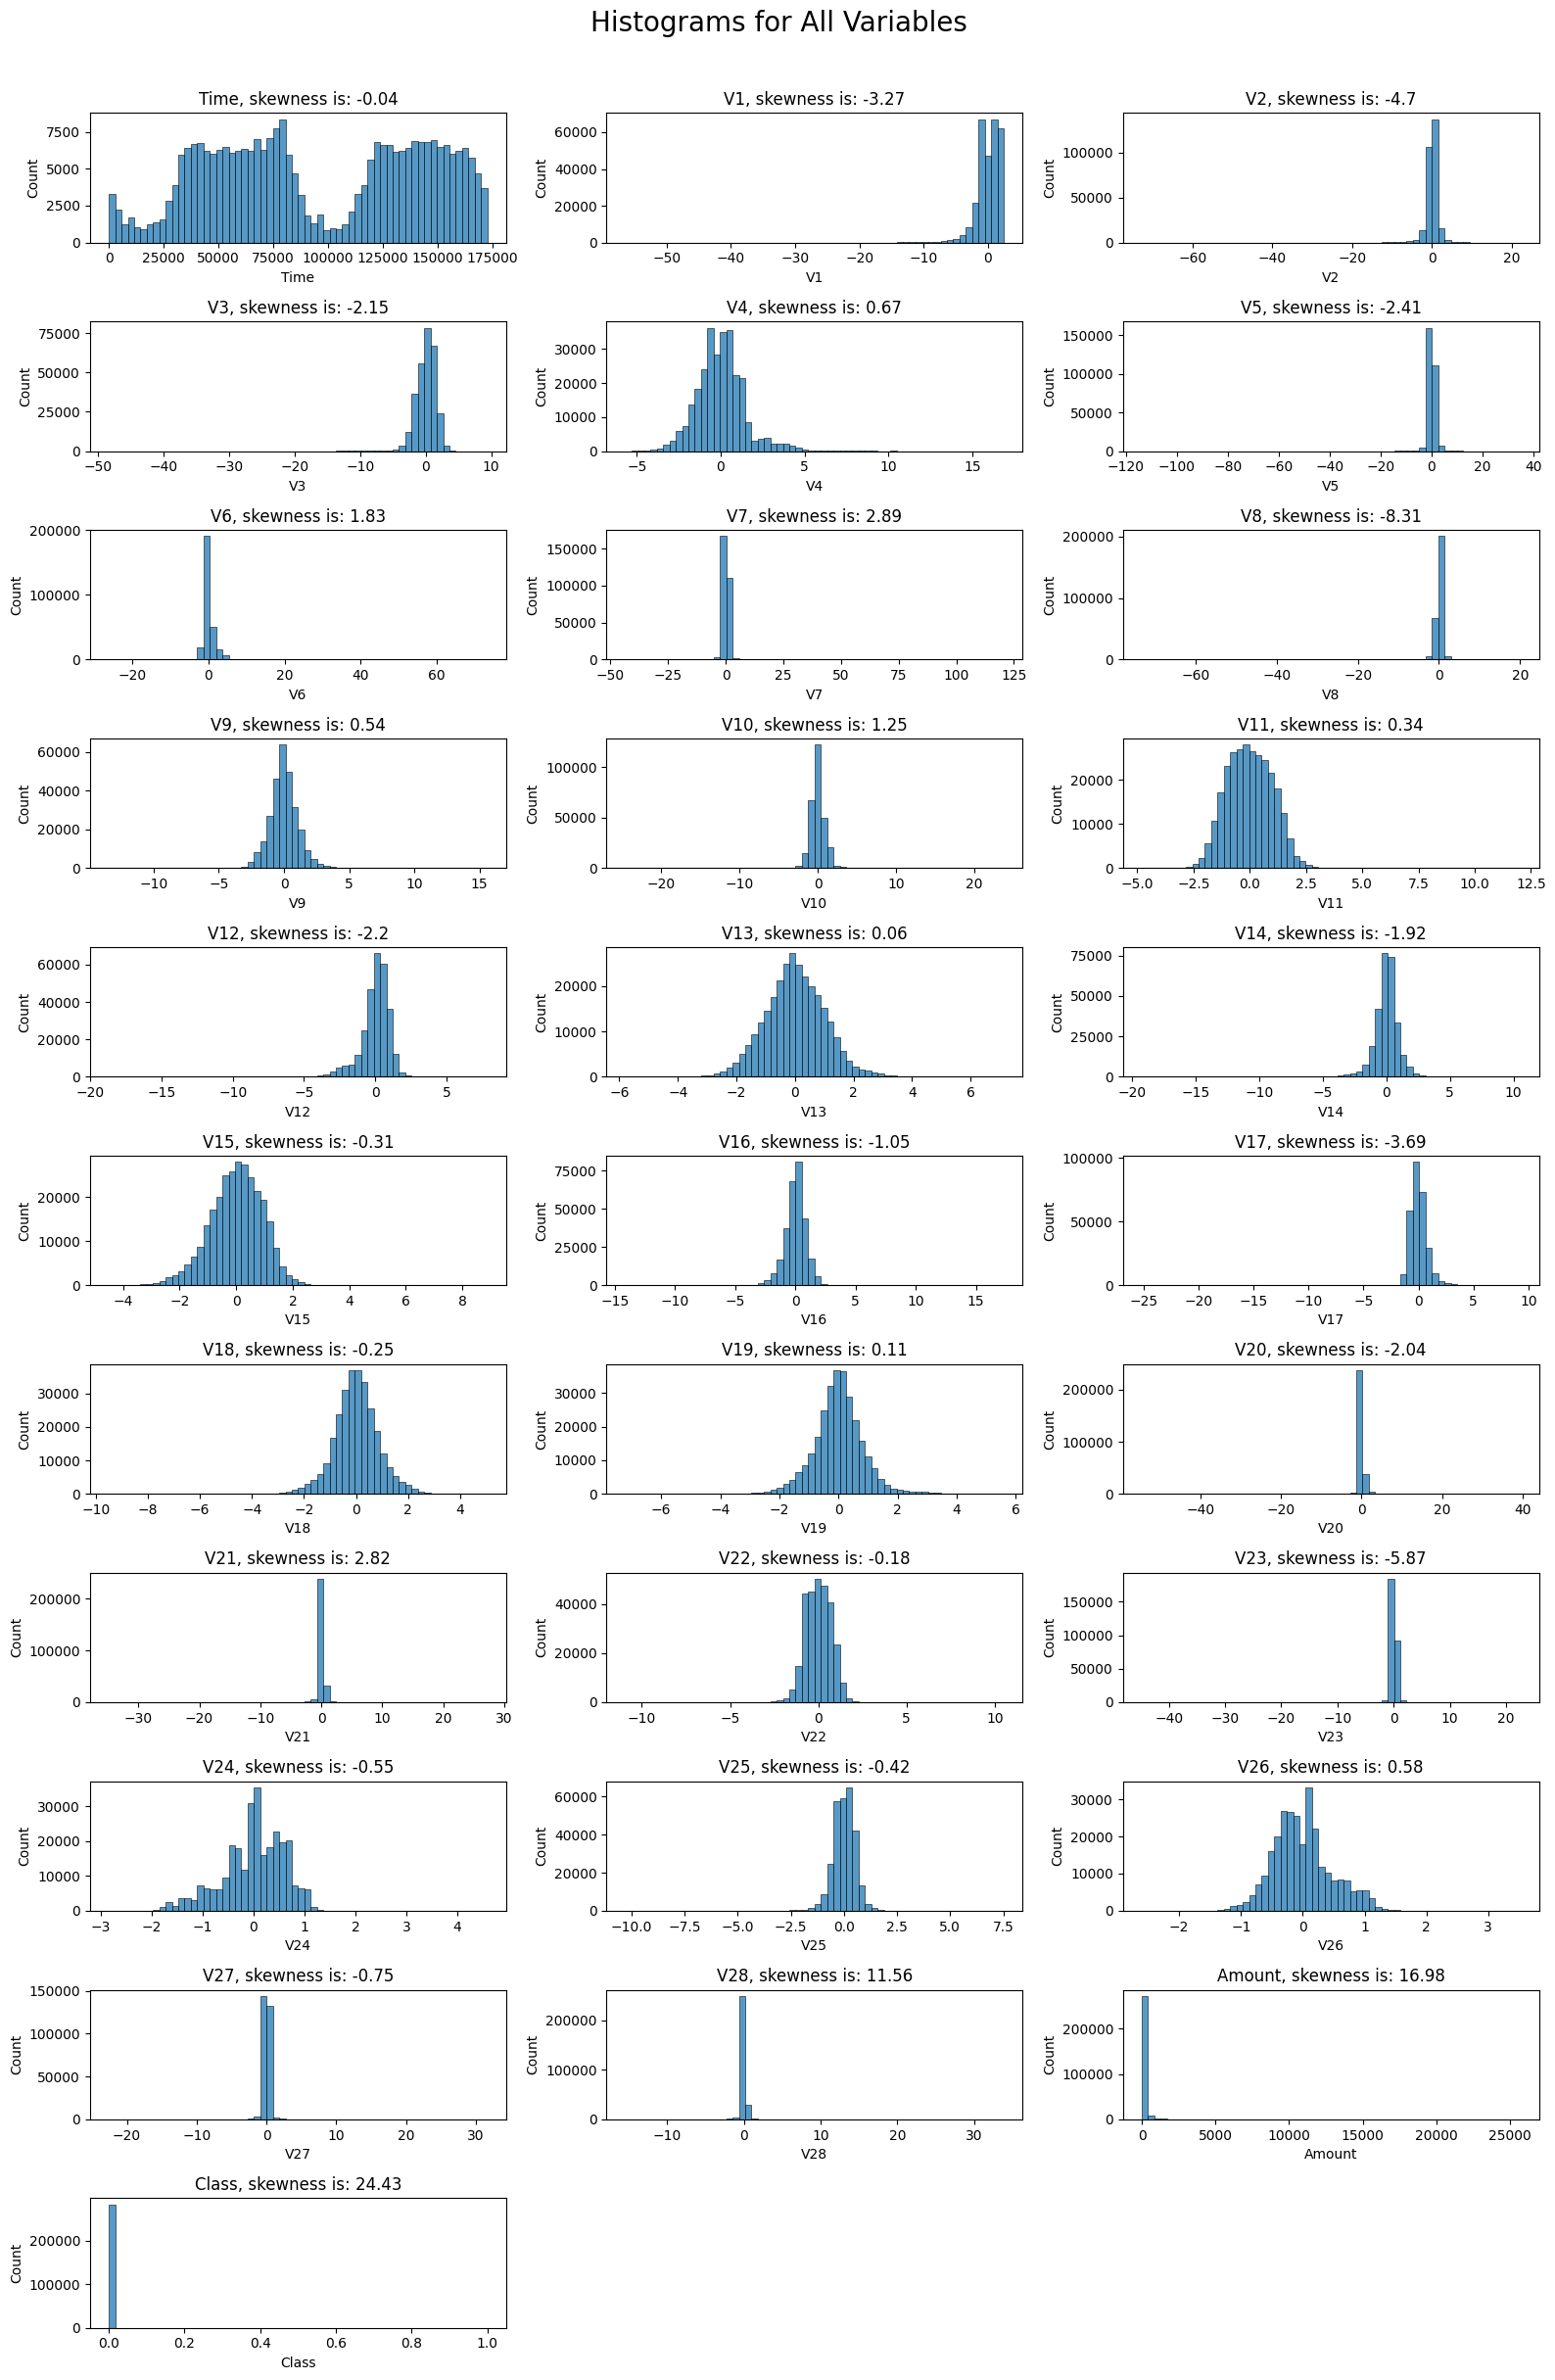

In [34]:
def histograms_custom(dataset, columns_list, rows, cols, suptitle):
    """
    Draws histograms for the specified columns in a dataset.

    Parameters:
    - dataset: DataFrame containing the data.
    - columns_list: List of column names to plot.
    - rows: Number of rows in the subplot grid.
    - cols: Number of columns in the subplot grid.
    - suptitle: Title for the entire figure.
    """
    # Create a figure with subplots arranged in rows and columns
    fig, axs = plt.subplots(rows, cols, sharey=False, figsize=(16, 25))

    # Set the overall title for the figure
    fig.suptitle(suptitle, y=0.97, size=20)

    # Flatten the 2D array of axes to make indexing easier
    axs = axs.flatten()

    # Loop over the list of columns and plot each one
    for i, data in enumerate(columns_list):
        # Create a histogram for each column
        sns.histplot(dataset[data], ax=axs[i], bins=60, kde=False)
        axs[i].set_title(data + ', skewness is: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    # Remove empty subplots if any
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make space for suptitle

    # Display the plot
    plt.show()

# Example usage
histograms_custom(dataset=df, columns_list=df, rows=11, cols=3, suptitle='Histograms for All Variables')

The above code shows us all of the distribution and skewness of all features in the dataset. However, it would be more useful if we can modify it to show only features that are highly skewed. To show these features with high skewness (i.e., skewness greater than 2 or less than -2), we can add a step to filter the columns_list based on their skewness values before plotting as followed.

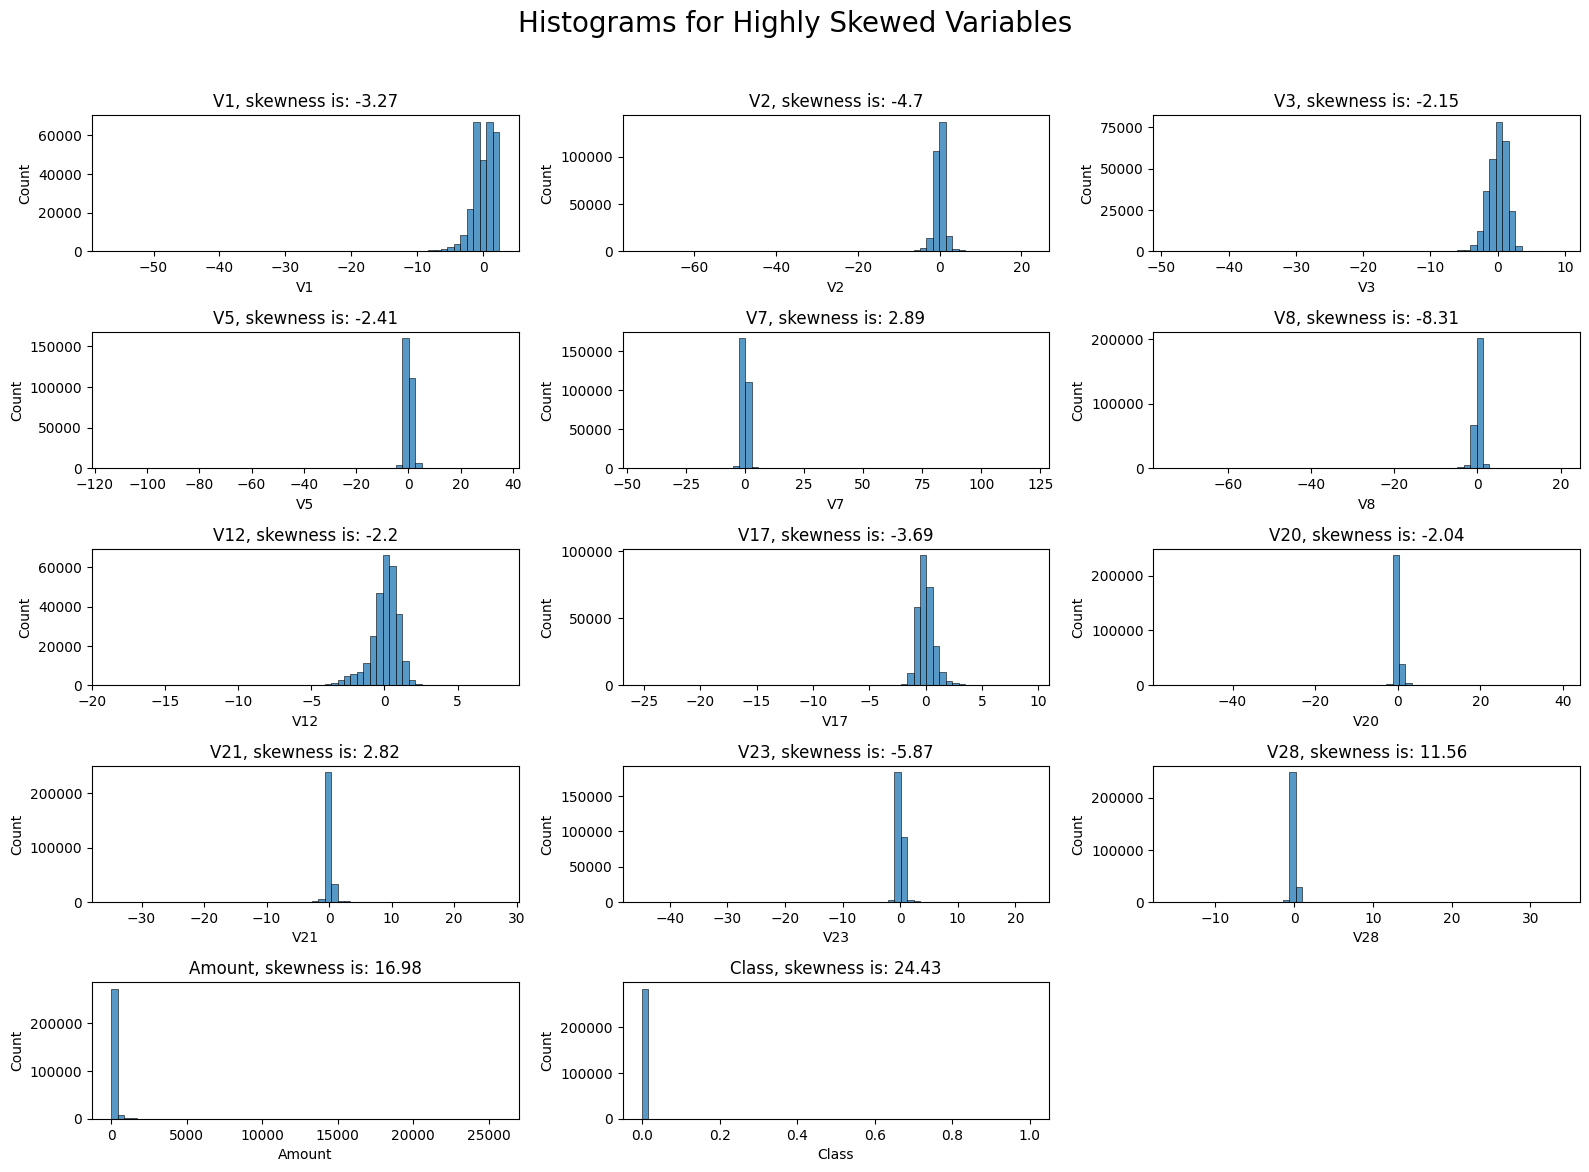

In [35]:
def histograms_custom(dataset, columns_list, rows, cols, suptitle):
    """
    Draws histograms for the specified columns in a dataset,
    but only for those columns that have high skewness.

    Parameters:
    - dataset: DataFrame containing the data.
    - columns_list: List of column names to plot.
    - rows: Number of rows in the subplot grid.
    - cols: Number of columns in the subplot grid.
    - suptitle: Title for the entire figure.
    """
    # Filter columns based on skewness
    skewed_columns = [col for col in columns_list if abs(dataset[col].skew(axis=0, skipna=True)) > 2]

    # Create a figure with subplots arranged in rows and columns
    fig, axs = plt.subplots(rows, cols, sharey=False, figsize=(16, 25))

    # Set the overall title for the figure
    fig.suptitle(suptitle, y=0.97, size=20)

    # Flatten the 2D array of axes to make indexing easier
    axs = axs.flatten()

    # Loop over the list of skewed columns and plot each one
    for i, data in enumerate(skewed_columns):
        # Create a histogram for each column
        sns.histplot(dataset[data], ax=axs[i], bins=60, kde=False)
        axs[i].set_title(data + ', skewness is: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    # Remove empty subplots if any
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make space for suptitle

    # Display the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'df.columns' includes all the columns you want to check
histograms_custom(dataset=df, columns_list=df.columns, rows=11, cols=3, suptitle='Histograms for Highly Skewed Variables')


Let's create **2 seperate lists of highly positive and highly negative skewed features**

In [36]:
# Set a threshold for considering skewness as "high"
threshold = 2.0

# Step 1: Calculate skewness for each feature
skewness = df.skew()

# Step 2: Filter and separate based on the threshold
high_positive_skewed_columns = skewness[(skewness > threshold)].index.tolist()
high_negative_skewed_columns = skewness[(skewness < -threshold)].index.tolist()

# Print the results
print("Highly Positive Skewed Columns:", high_positive_skewed_columns)
print("Highly Negative Skewed Columns:", high_negative_skewed_columns)

Highly Positive Skewed Columns: ['V7', 'V21', 'V28', 'Amount', 'Class']
Highly Negative Skewed Columns: ['V1', 'V2', 'V3', 'V5', 'V8', 'V12', 'V17', 'V20', 'V23']


In [37]:
highly_positive_skewed_columns = ['V7', 'V21', 'V28', 'Amount']
highly_negative_skewed_columns = ['V1', 'V2', 'V3', 'V5', 'V8', 'V12', 'V17', 'V20', 'V23']

In [38]:
# Verify skewness after transformation
for col in highly_positive_skewed_columns + highly_negative_skewed_columns:
    print(f"Skewness of {col} before transformation: {df[col].skew()}")

Skewness of V7 before transformation: 2.890271192715498
Skewness of V21 before transformation: 2.820033113572543
Skewness of V28 before transformation: 11.555115084196773
Skewness of Amount before transformation: 16.978803370060476
Skewness of V1 before transformation: -3.273271248440309
Skewness of V2 before transformation: -4.6951619005404694
Skewness of V3 before transformation: -2.1519839570997124
Skewness of V5 before transformation: -2.414079246966253
Skewness of V8 before transformation: -8.310970330052545
Skewness of V12 before transformation: -2.1990082816149954
Skewness of V17 before transformation: -3.690497194148406
Skewness of V20 before transformation: -2.0431210560273323
Skewness of V23 before transformation: -5.867220791006341


### 2.2.3. Features Transformation

Normally, when deal with extreme skewness in the data, here are my approachs:
- Positive Skew: Apply log or root transformations.
- Negative Skew: Reflect data and apply log transformation, or use power transformations like Box-Cox.
- Check for Nulls: Handle NaNs that might result from these transformations.
- Evaluate Impact: Make sure these transformations improve model performance and maintain the integrity of fraud detection.

However, in this Credit Fraud Dataset, as showed in the descriptive statistics section, all features contain non-negative values (a minimum value for every column is recorded with a negative value). This creates **challenges when applying traditional transformations** like logarithmic or Box-Cox, which require strictly positive values.

**Assess the Necessity of Skewness Correction:**
- Model Type Consideration: This notebook will use tree-based models, including Random Forests and Gradient Boosting to classify fraudulent transactions. These models are less sensitive to skewness. Therefore, skewness correction is not the main focus.
- Impact on Fraud Detection: For fraud detection, the skewness of certain features might actually be informative. Highly skewed features could carry critical information that distinguishes fraudulent from non-fraudulent transactions. Therefore, it might not always be necessary—or even desirable—to transform such features.

**Decision**:
- For the aim of this notebook, the skewness transformation will not be applied despite the highly skewed features.
- However, the 'Amount' should be transformed for more meaningful analysis.

In [39]:
df['Amount'].describe()

,Amount
count,283726.000000
mean,88.472687
std,250.399437
min,0.000000
25%,5.600000
50%,22.000000
75%,77.510000
max,25691.160000


In [40]:
df['Amount'] = np.log1p(df['Amount'])

In [41]:
df['Amount'].describe()

,Amount
count,283726.000000
mean,3.153760
std,1.657080
min,0.000000
25%,1.887070
50%,3.135494
75%,4.363226
max,10.153941


## 2.3. Correlation Analysis

In [42]:
# Step 1: Calculate and list correlation with 'Class'

correlation_with_class = df.corr()['Class'].sort_values(ascending=False)

# Display correlation values
print(correlation_with_class)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Amount   -0.007798
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


<ipython-input-43-0f76d9e7fc17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette='viridis')


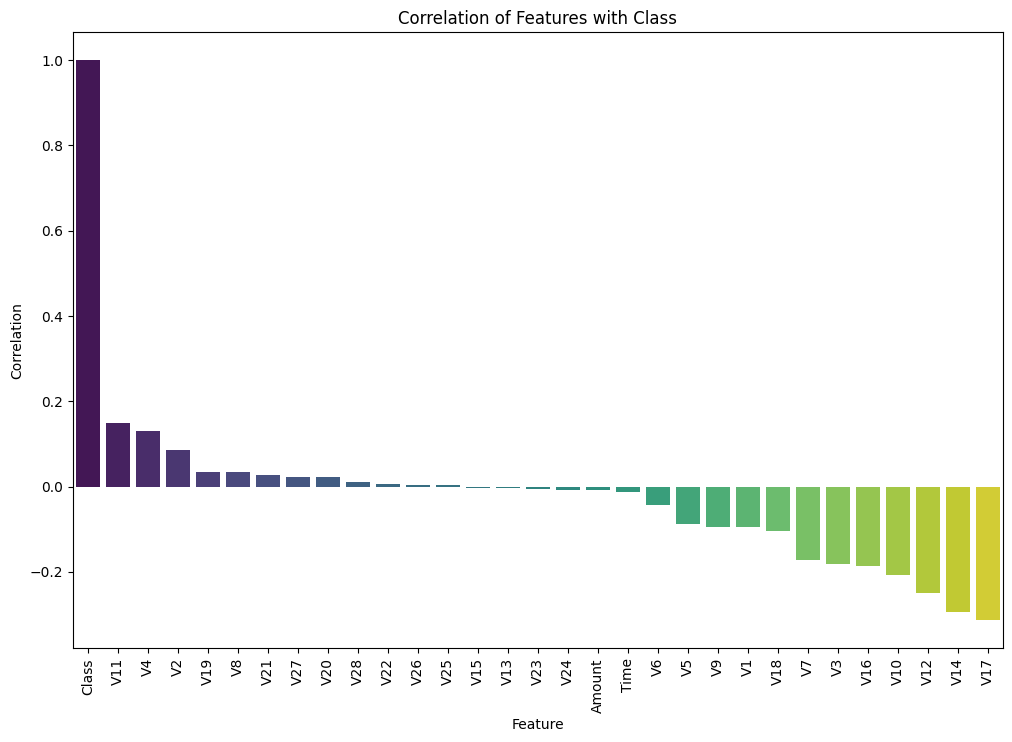

In [43]:
# Step 2: Plot the bar chart of correlations

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Class')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

In [44]:
# Step 3: List important features with correlation > 0.1 or < -0.1
important_features = correlation_with_class[correlation_with_class.abs() > 0.1].index.tolist()

# Remove 'Class' from the list if it's included
if 'Class' in important_features:
    important_features.remove('Class')

print("Important Features:", important_features)


Important Features: ['V11', 'V4', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']


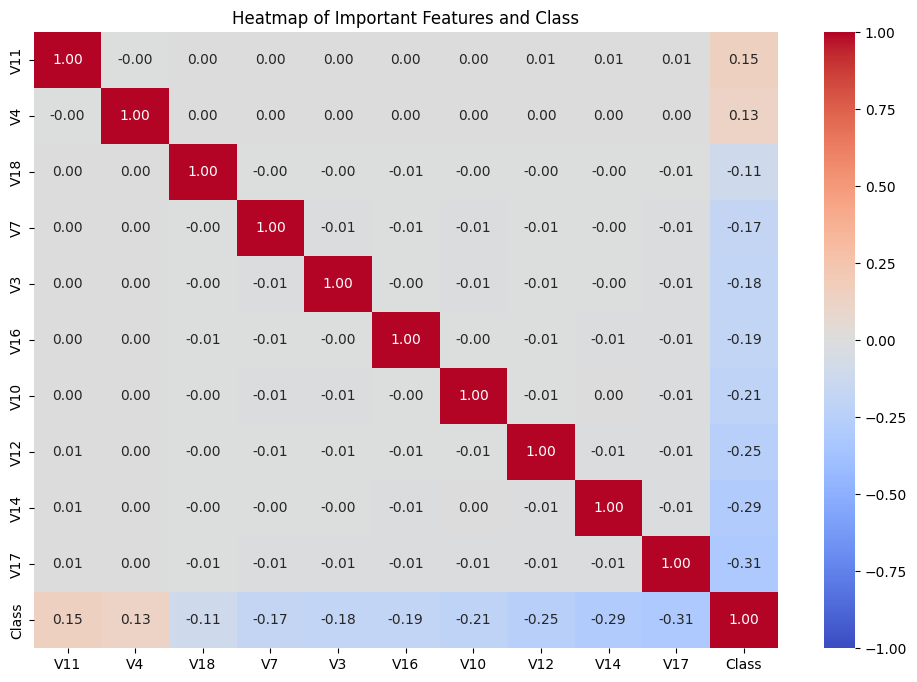

In [45]:
# Step 4: Create a heatmap of the important features
# Add 'Class' back for correlation with class
important_features.append('Class')
df_important = df[important_features]

# Calculate the correlation matrix
corr_matrix = df_important.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Heatmap of Important Features and Class')
plt.show()

**Intepretation of Correlation Results**
- **Negative Correlation**: Most of the correlation coefficients for important features the are negative (except fot 'V4' and 'V11'), which implies that as the values of these features increase, the likelihood of a transaction being fraudulent decreases.

- **Feature Independence**: The lack of correlation among features suggests that the principal components (V1, V2, ..., V28) and the transaction Amount are designed to be orthogonal or nearly orthogonal. This is expected when using PCA, as PCA components are uncorrelated by construction.


## 2.4. Visualization of Important Features

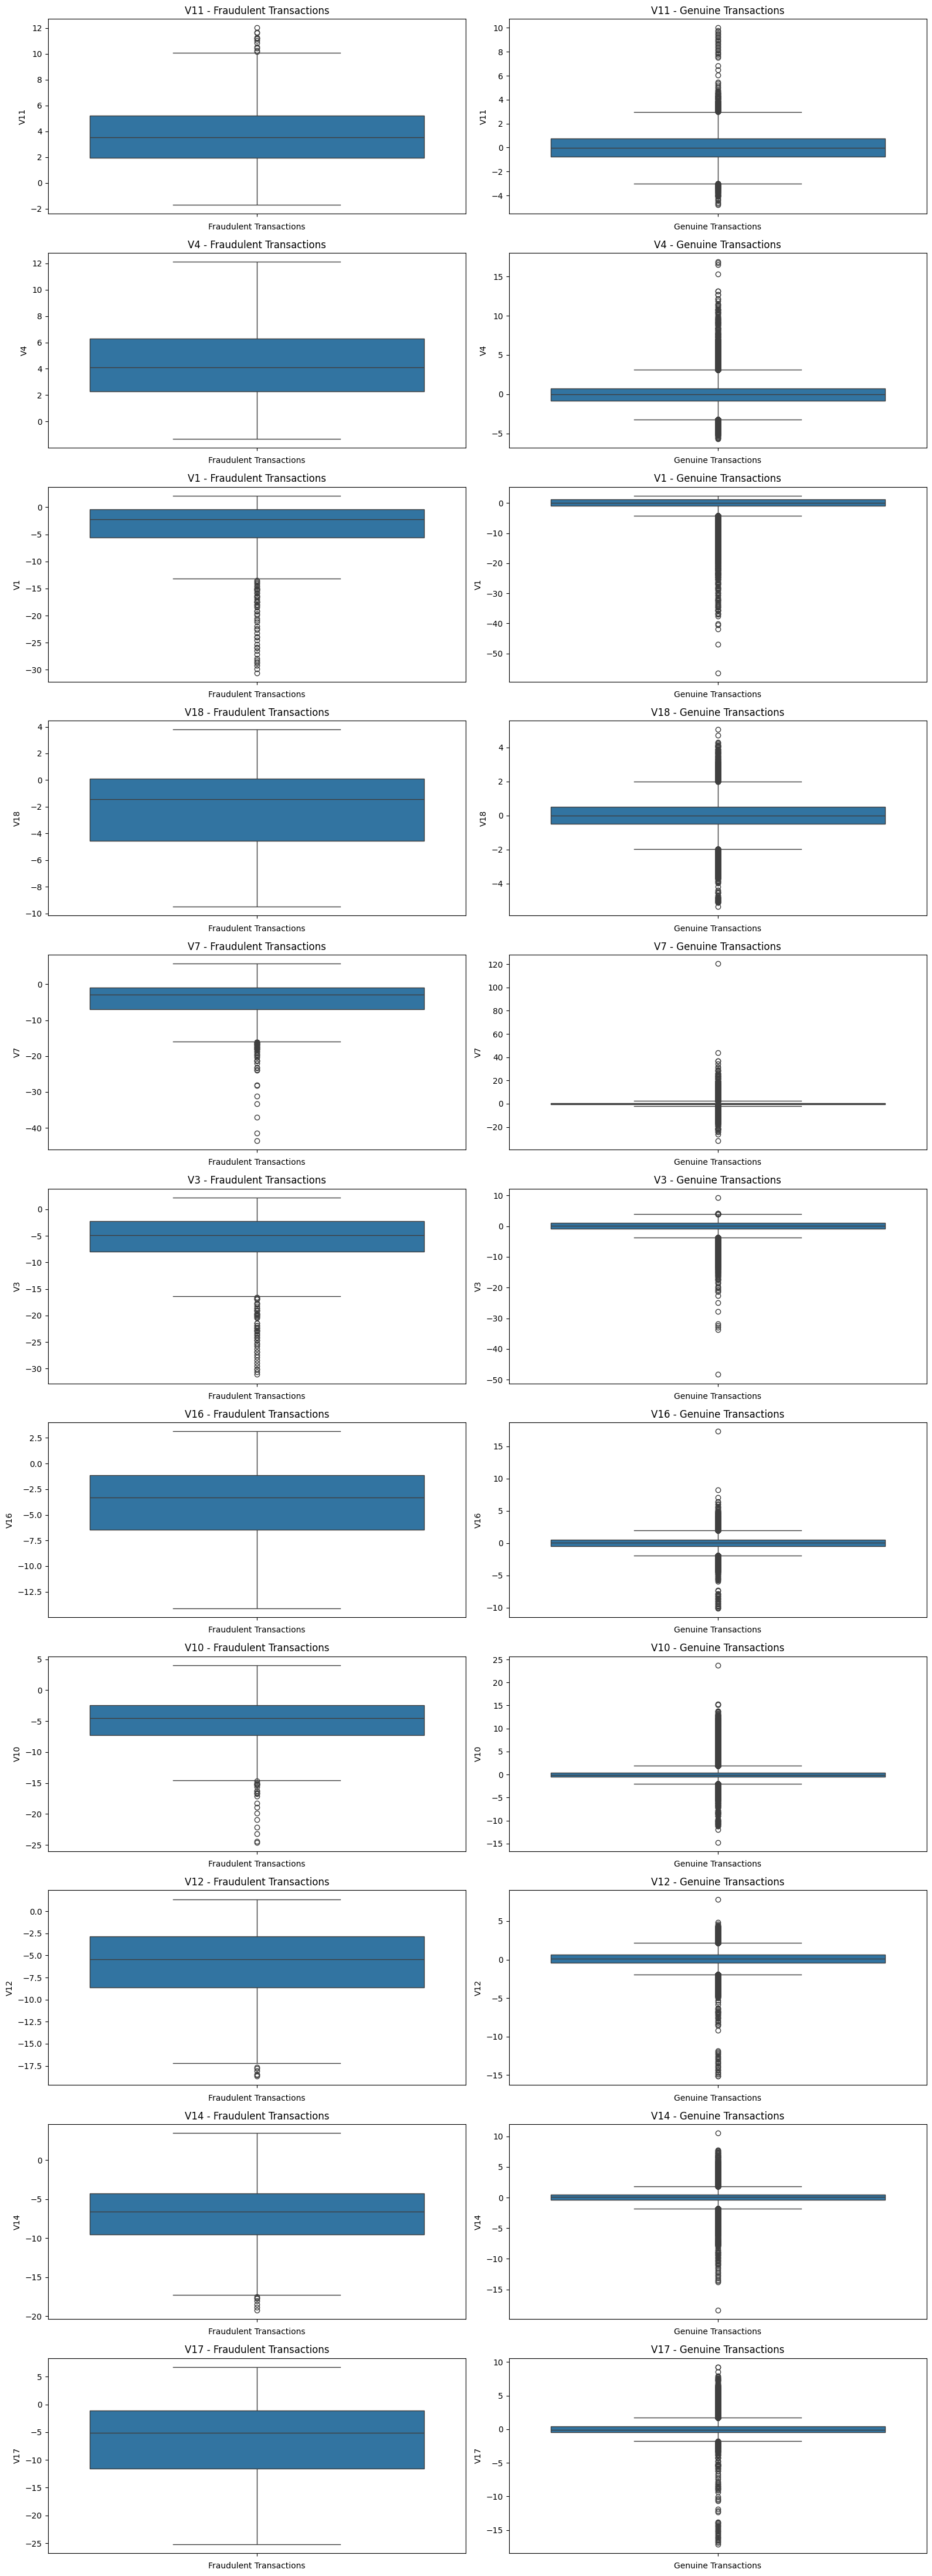

In [46]:
important_features = ['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']  # Adjust as necessary

# Create subsets of the DataFrame for each class
df_fraud = df[df['Class'] == 1]
df_genuine = df[df['Class'] == 0]

# Plot boxplots for each important feature
fig, axs = plt.subplots(len(important_features), 2, figsize=(16, len(important_features) * 4), sharex=False)

for i, feature in enumerate(important_features):
    # Plot for fraudulent transactions
    sns.boxplot(y=df_fraud[feature], ax=axs[i, 0])
    axs[i, 0].set_title(f'{feature} - Fraudulent Transactions')
    axs[i, 0].set_xlabel('Fraudulent Transactions')
    axs[i, 0].set_ylabel(feature)

    # Plot for genuine transactions
    sns.boxplot(y=df_genuine[feature], ax=axs[i, 1])
    axs[i, 1].set_title(f'{feature} - Genuine Transactions')
    axs[i, 1].set_xlabel('Genuine Transactions')
    axs[i, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()


# 3. Outliers Detection

## 3.1. Introduciton to Outliers Detection and why it is important

Outliers are data points that differ significantly from other observations in your dataset. In fraud detection, these outliers may represent fraudulent transactions, which makes it crucial to identify and analyze them effectively. However, not all outliers are fraudulent, so careful consideration is required when deciding how to handle them.

## 3.2. Apply Outliers Detection Methods

### 3.2.1. Isolation Forest

The Isolation Forest algorithm is particularly well-suited for detecting anomalies in high-dimensional datasets, such as the credit card transactions dataset.

**Explanation:**

- We fit the Isolation Forest model on the dataset's features, including the PCA-transformed features and the 'Amount' column.
- The model flags transactions as either outliers (-1) or normal (1).
- The outliers are then extracted for further analysis.

In [47]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

# Fit the model to the data
# Assuming the 'Amount' and PCA components ('V1' to 'V28') are features
clf.fit(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
            'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
            'Amount']])

# Predict anomalies: -1 for outliers, 1 for normal points
df['anomaly_iforest'] = clf.predict(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                        'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                                        'V13', 'V14', 'V15', 'V16', 'V17',
                                        'V18', 'V19', 'V20', 'V21', 'V22',
                                        'V23', 'V24', 'V25', 'V26', 'V27',
                                        'V28', 'Amount']])

# Identify the outliers
outliers_iforest = df[df['anomaly_iforest'] == -1]

print(f'Number of outliers detected by Isolation Forest: {len(outliers_iforest)}')
print(outliers_iforest.head())

Number of outliers detected by Isolation Forest: 284
         Time         V1         V2         V3        V4         V5  \
1632   1264.0 -11.140706  -9.612726 -12.389545  6.013346 -32.092129   
2963   2507.0  -6.200114   5.025406  -2.742492 -0.940903  -6.656259   
6812   8592.0 -23.066842 -25.640527  -3.080313  4.866932   6.901397   
7744  10785.0  -6.057491   5.243408  -1.809137  0.666109  -3.233775   
8335  11131.0  -1.426623   4.141986  -9.804103  6.666273  -4.749527   

             V6         V7         V8        V9  ...       V22        V23  \
1632  21.393069  34.303177  -7.520784 -1.925732  ...  1.366110  -2.925888   
2963   5.432294  -9.198175 -22.588547 -3.244295  ...  4.393846   1.943002   
6812  -4.074335   2.027345  -2.688652  3.402966  ...  3.312971  13.876221   
7744   5.409330 -10.470770 -22.293982 -1.213877  ...  4.534454   1.891494   
8335  -2.073129 -10.089931   2.791345 -3.249516  ...  0.407809   0.605809   

           V24       V25       V26       V27       V28   

### 3.2.2. IQR

The IQR method is a simple statistical technique to detect univariate outliers. It works well for data that is not too high-dimensional and does not assume any specific distribution.

**Explanation:**

- We define a function to calculate the IQR and detect outliers for each feature.
- The IQR method is applied to each column in the dataset, and outliers are identified.
- The results are combined to provide a list of outliers across all features.

In [48]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the IQR method to all features and combine the results
outliers_iqr = pd.DataFrame()

for column in df.columns:
    outliers_iqr = pd.concat([outliers_iqr, detect_outliers_iqr(df, column)])

outliers_iqr = outliers_iqr.drop_duplicates()
print(f'Number of outliers detected by IQR method: {len(outliers_iqr)}')
print(outliers_iqr.head())

Number of outliers detected by IQR method: 128099
      Time        V1         V2        V3        V4        V5        V6  \
18    14.0 -5.401258  -5.450148  1.186305  1.736239  3.049106 -1.763406   
85    55.0 -4.575093  -4.429184  3.402585  0.903915  3.002224 -0.491078   
140   87.0 -5.101877   1.897022 -3.458034 -1.277543 -5.517758  2.098366   
146   92.0 -5.285971   4.847323 -1.290368 -1.427842 -0.621533 -0.604691   
164  103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   

           V7        V8        V9  ...       V22       V23       V24  \
18  -1.559738  0.160842  1.233090  ...  0.984460  2.458589  0.042119   
85  -2.705393  0.666451  1.922216  ...  0.853360 -0.971600 -0.114862   
140  3.329603  1.250966  0.271501  ... -0.678879 -0.555900 -0.761660   
146  0.437866  0.336384  3.558373  ... -1.171187  0.150872 -0.493322   
164  4.808426 -0.228197 -0.525896  ... -2.264037 -3.553381  1.215279   

          V25       V26       V27       V28    Amount  Class  anom

## 3.3. Decision on Handling Outliers

**The steps included in this section are:**
- Comparing the results
- Considering the impacts on Fraud Detection
- Decision making

In [49]:
# Compare the outliers detected by both methods
common_outliers = pd.merge(outliers_iforest, outliers_iqr, how='inner', on=df.columns.tolist())
print(f'Number of common outliers detected by both methods: {len(common_outliers)}')

Number of common outliers detected by both methods: 284


In [50]:
# Analyze the distribution of fraud in outliers
fraud_in_outliers_iforest = outliers_iforest[outliers_iforest['Class'] == 1]
fraud_in_outliers_iqr = outliers_iqr[outliers_iqr['Class'] == 1]

print(f'Fraudulent transactions in Isolation Forest outliers: {len(fraud_in_outliers_iforest)}')
print(f'Fraudulent transactions in IQR outliers: {len(fraud_in_outliers_iqr)}')

Fraudulent transactions in Isolation Forest outliers: 96
Fraudulent transactions in IQR outliers: 473


In [51]:
# Decision: Flag the outliers instead of removing them
df['flagged_as_outlier'] = (df.index.isin(outliers_iforest.index)) | (df.index.isin(outliers_iqr.index))

In [52]:
# Drop the 'anomaly_iforest' column because 'flagged_as_outlier' column provides sufficient information
df.drop(columns=['anomaly_iforest'], inplace=True)

# Confirm the column is dropped
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28    Amount 

# 4. Model Building

## 4.1. Selection of Algorithms

**Random Forest:**

- Strengths: Handles imbalanced data well, robust to overfitting, interpretable feature importance.
- Use Case: Suitable for classification problems with many features and complex interactions.

**XGBoost:**

- Strengths: High performance, particularly on imbalanced datasets, handles non-linear relationships well.
- Use Case: Effective for classification tasks, especially with large datasets.

## 4.2. Model Training

### 4.2.1. Train-Test Split

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 4.2.2. Apply Resampling Methods

In [54]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
#Undersampling using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

### 4.2.3. Train Models

**a. Random Forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train on original data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest - Original Data")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest - Original Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.76      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118

AUC-ROC: 0.913427917344019


In [57]:
# Train on SMOTE-resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = rf_smote.predict(X_test)
print("Random Forest - SMOTE Data")
print(classification_report(y_test, y_pred_smote))
print("AUC-ROC:", roc_auc_score(y_test, rf_smote.predict_proba(X_test)[:,1]))

# Train on Undersampled data
rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_resampled, y_train_resampled)
y_pred_rus = rf_rus.predict(X_test)
print("Random Forest - Undersampled Data")
print(classification_report(y_test, y_pred_rus))
print("AUC-ROC:", roc_auc_score(y_test, rf_rus.predict_proba(X_test)[:,1]))

Random Forest - SMOTE Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.05      0.87      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.92      0.54     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC: 0.9751757165569201
Random Forest - Undersampled Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.05      0.87      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.92      0.54     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC: 0.9751757165569201


In [61]:
# Random Forest metrics
precision_rf = 0.96
recall_rf = 0.76
f1_rf = 0.85
auc_roc_rf = 0.91

precision_rf_smote = 0.05
recall_rf_smote = 0.87
f1_rf_smote = 0.98
auc_roc_rf_smote = 0.97

precision_rf_rus = 0.05
recall_rf_rus = 0.97
f1_rf_rus = 0.98
auc_roc_rf_rus = 0.97

**b. XGBoost**

In [60]:
import xgboost as xgb

# Train on original data
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost - Original Data")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))

# Train on SMOTE-resampled data
xgb_smote = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_smote = xgb_smote.predict(X_test)
print("XGBoost - SMOTE Data")
print(classification_report(y_test, y_pred_xgb_smote))
print("AUC-ROC:", roc_auc_score(y_test, xgb_smote.predict_proba(X_test)[:,1]))

# Train on Undersampled data
xgb_rus = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_rus.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_rus = xgb_rus.predict(X_test)
print("XGBoost - Undersampled Data")
print(classification_report(y_test, y_pred_xgb_rus))
print("AUC-ROC:", roc_auc_score(y_test, xgb_rus.predict_proba(X_test)[:,1]))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:56:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Original Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.75      0.84       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118

AUC-ROC: 0.9823715760009123


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:56:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - SMOTE Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.04      0.90      0.08       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.53     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC: 0.9819974438515863


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:56:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Undersampled Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.04      0.90      0.08       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.53     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC: 0.9819974438515863


In [62]:
# XGBoost metrics
precision_xgb = 0.96
recall_xgb = 0.75
f1_xgb = 0.84
auc_roc_xgb = 0.98

precision_xgb_smote = 0.04
recall_xgb_smote = 0.90
f1_xgb_smote = 0.08
auc_roc_xgb_smote = 0.98

precision_xgb_rus = 0.04
recall_xgb_rus = 0.90
f1_xgb_rus = 0.08
auc_roc_xgb_rus = 0.98

## 4.3. Model Evaluation

**Compare Performance Metrics:**
- Precision: The accuracy of positive predictions.
- Recall: The ability to find all relevant instances of the positive class.
- F1-Score: The harmonic mean of precision and recall.
- AUC-ROC: The area under the receiver operating characteristic curve, representing the model's ability to distinguish between classes.

In [63]:
import pandas as pd

# Summary of metrics
metrics = {
    'Model': ['Random Forest - Original', 'Random Forest - SMOTE', 'Random Forest - Undersampled',
              'XGBoost - Original', 'XGBoost - SMOTE', 'XGBoost - Undersampled'],
    'Precision': [precision_rf, precision_rf_smote, precision_rf_rus, precision_xgb, precision_xgb_smote, precision_xgb_rus],
    'Recall': [recall_rf, recall_rf_smote, recall_rf_rus, recall_xgb, recall_xgb_smote, recall_xgb_rus],
    'F1-Score': [f1_rf, f1_rf_smote, f1_rf_rus, f1_xgb, f1_xgb_smote, f1_xgb_rus],
    'AUC-ROC': [auc_roc_rf, auc_roc_rf_smote, auc_roc_rf_rus, auc_roc_xgb, auc_roc_xgb_smote, auc_roc_xgb_rus]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                          Model  Precision  Recall  F1-Score  AUC-ROC
0      Random Forest - Original       0.96    0.76      0.85     0.91
1         Random Forest - SMOTE       0.05    0.87      0.98     0.97
2  Random Forest - Undersampled       0.05    0.97      0.98     0.97
3            XGBoost - Original       0.96    0.75      0.84     0.98
4               XGBoost - SMOTE       0.04    0.90      0.08     0.98
5        XGBoost - Undersampled       0.04    0.90      0.08     0.98


Here's an interpretation of the results across different models and resampling techniques:

### **1. Random Forest - Original**
- **Precision (0.96):** The model is highly precise, meaning when it predicts a transaction as fraudulent, it's correct 96% of the time.
- **Recall (0.76):** The recall is moderate, capturing 76% of actual fraudulent transactions.
- **F1-Score (0.85):** The F1-Score balances precision and recall, indicating good performance with a slight lean towards precision.
- **AUC-ROC (0.91):** The model has a strong overall performance in distinguishing between fraudulent and non-fraudulent transactions.

**Interpretation:** The model is performing well, especially in identifying fraud correctly (high precision). However, it misses some actual fraud cases (lower recall).

### **2. Random Forest - SMOTE**
- **Precision (0.05):** Extremely low precision, indicating many false positives.
- **Recall (0.87):** High recall, meaning it captures most of the actual frauds.
- **F1-Score (0.98):** The F1-Score seems unusually high, likely due to the imbalance caused by SMOTE.
- **AUC-ROC (0.97):** The model has a very high overall discriminatory power.

**Interpretation:** SMOTE has significantly increased recall but at the cost of precision. The model is now over-identifying frauds, resulting in a high number of false positives.

### **3. Random Forest - Undersampled**
- **Precision (0.05):** Similarly low precision as SMOTE, indicating a high number of false positives.
- **Recall (0.97):** Extremely high recall, almost all fraud cases are identified.
- **F1-Score (0.98):** The F1-Score is high, similar to SMOTE.
- **AUC-ROC (0.97):** The model performs well in distinguishing classes overall.

**Interpretation:** Undersampling has led to a very similar outcome as SMOTE. The model is overly sensitive to detecting fraud, resulting in many false positives, but almost all frauds are caught.

### **4. XGBoost - Original**
- **Precision (0.96):** High precision, similar to Random Forest - Original, indicating low false positives.
- **Recall (0.75):** Lower recall compared to Random Forest - Original, missing more fraud cases.
- **F1-Score (0.84):** Slightly lower F1-Score due to the lower recall.
- **AUC-ROC (0.98):** Excellent overall performance in distinguishing between the classes.

**Interpretation:** XGBoost with the original data performs similarly to Random Forest - Original, with a slight trade-off between precision and recall. It's still strong in overall performance.

### **5. XGBoost - SMOTE**
- **Precision (0.04):** Very low precision, indicating the model identifies many false positives.
- **Recall (0.90):** High recall, meaning most fraud cases are caught.
- **F1-Score (0.08):** Very low F1-Score, suggesting the trade-off is unfavorable.
- **AUC-ROC (0.98):** High AUC-ROC, showing good overall performance in discrimination.

**Interpretation:** Similar to Random Forest - SMOTE, the model's recall has increased significantly, but at the cost of precision. The model is over-predicting fraud, resulting in many false positives.

### **6. XGBoost - Undersampled**
- **Precision (0.04):** Again, very low precision.
- **Recall (0.90):** High recall, catching most fraudulent cases.
- **F1-Score (0.08):** Very low F1-Score, indicating poor balance between precision and recall.
- **AUC-ROC (0.98):** The model has strong discriminatory power overall.

**Interpretation:** XGBoost with undersampling has the same issue as with SMOTE; the model is too sensitive to fraud detection, leading to many false positives but ensuring most frauds are detected.

### **Overall Analysis:**
- **Original Data:** Both models (Random Forest and XGBoost) perform well with the original data, offering a good balance between precision and recall. This results in fewer false positives while still catching a majority of fraud cases.
- **SMOTE and Undersampling:** Both methods significantly improve recall but drastically reduce precision. This could lead to operational inefficiencies due to a high number of false alarms.

### **Recommendation:**
- **Original Data:** The models perform best with the original data, maintaining a balance between precision and recall. This balance is crucial in real-world applications to avoid overwhelming systems with false positives.
- **SMOTE/Undersampling:** These methods may be useful in scenarios where missing a fraudulent transaction is far more costly than investigating false positives. However, the extreme drop in precision suggests these methods might not be practical for this dataset.

# 5. Conclusions

#### **5.1 Summary of Findings**
This project aimed to detect fraudulent transactions in a credit card dataset by applying various preprocessing techniques, resampling methods, and machine learning models. The key findings are as follows:

- **Data Preprocessing:** We addressed issues such as skewness and outliers, ensuring the data was prepared for effective model training. While feature transformations were considered, maintaining original distributions often proved more beneficial for model performance.
- **Model Performance:** Two machine learning models, Random Forest and XGBoost, were evaluated across different sampling techniques (Original Data, SMOTE, and Undersampling). Both models performed best on the original data, with XGBoost slightly outperforming Random Forest in terms of the AUC-ROC score.
- **Impact of Resampling:** While SMOTE and Undersampling improved recall, they significantly reduced precision, leading to a high number of false positives. This trade-off highlights the importance of balancing the need for detecting fraud against the operational costs of investigating false alarms.

#### **5.2 Challenges and Limitations**
Several challenges and limitations were encountered during the project:

- **Imbalanced Dataset:** The extreme imbalance between genuine and fraudulent transactions made it difficult to achieve high recall without sacrificing precision. This is a common issue in fraud detection that requires careful handling.
- **Model Sensitivity:** The models, particularly with SMOTE and undersampling, became too sensitive to detecting fraud, which led to many false positives. This sensitivity highlights the challenge of tuning models in highly imbalanced datasets.
- **Computational Constraints:** Running advanced models like XGBoost on large datasets can be computationally intensive, particularly when using resampling techniques like SMOTE, which increases the dataset size.

#### **5.3 Future Work**
To further enhance the effectiveness of fraud detection in this context, the following areas could be explored:

- **Advanced Feature Engineering:** Incorporating domain-specific knowledge to create more informative features could improve model performance, especially in capturing the subtle patterns of fraud.
- **Hybrid Sampling Techniques:** A combination of SMOTE and undersampling, or using alternative methods like SMOTE-Tomek, could be tested to find a better balance between recall and precision.
- **Ensemble Models:** Combining multiple models, or using techniques like stacking, might improve performance by leveraging the strengths of different algorithms.
- **Real-Time Detection:** Future work could focus on deploying these models in a real-time environment, where the speed and accuracy of fraud detection are critical.
- **Cost-Sensitive Learning:** Further exploration of cost-sensitive algorithms could help in explicitly incorporating the costs of false positives and false negatives, leading to more balanced and practical models.

By addressing these challenges and exploring future avenues, the model's ability to detect fraudulent transactions in a credit card dataset can be significantly enhanced, leading to more effective and reliable fraud prevention systems.